# Iniciación en Python con Aplicaciones en Aceración (module 02)

# 1a. Modelos para el cálculo de capacidad de sulfuros

**Dr. Edgar Ivan Castro Cedeño**

[edgar.castro@cinvestav.mx](mailto:edgar.castro@cinvestav.mx)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import src.sulfideCapacityModels as cS

## 1.1 Contexto metalúrgico

La capacidad de sulfuro, $C_s$, es un concepto utilizado ampliamente en pirometalurgia, y que define la capacidad de una escoria fundida homogenea para remover el azufre durante una operación de refinación.

Se considera que la capacidad de sulfuro es una propiedad única de cada escoria, y que depende de la composición química y la temperatura. En la literatura existen varios modelos que permiten estimarla en función de estos parámetros.

El concepto de capacidad de sulfuro permite comparar bajo el mismo marco de trabajo la capacidad de desulfuración de distintas escorias.


La disponibilidad de datos de capacidad de azufre en función de composición y temperatura son limitados, y generalmente no cubren todos los casos que se pueden presentar en la industria. Es por esto que la utilización de modelos que permitan estimar esta propiedad es importante.

## 1.2 Definiciones

### 1.2.1 Capacidad de sulfuro, Cs

**Reacción de interés**

La capacidad de una escoria para disolver azufre, $S^{2-}$, se determina mediante experimentos de equilibrio entre una escoria fundida y una mezcla gaseosa oxígeno-azufre a temperatura constante.



$$ \frac{1}{2} S_2(g) + \left(O^{2-}\right)_{slag} = \frac{1}{2} O_2(g) + \left(S^{2-}\right)_{slag} \quad\quad \mathrm{Reac.\,1.1}$$

$$ K_{1.1} = \underbrace{\frac{a_{S^{2-}}}{a_{O^{2-}}}}_{no \,medible} \,\,\underbrace{\left(\frac{p_{O_2}}{p_{S_2}}\right)^{1/2}}_{medible}$$

donde
- $a_{S^{2-}}$ y $a_{O^{2-}}$, son las actividades de los iones de azufre y oxígeno en la escoria (no medibles).
- $p_{O_2}$ y $p_{S_2}$, son las presiones parciales de oxígeno y azufre en la mezcla gaseosa (medibles).

**Definición formal**

La capacidad de azufre, definida por [Finchan, C. J. & Richardson F. D (1954)](https://doi.org/10.1098/rspa.1954.0099)  , se obtiene al reacomodar los términos en la constante de equilibrio de la Reacción 1.1, de tal forma que los términos medibles queden de un lado de la ecuación.



$$ C_S = \underbrace{K_{1.1} \frac{a_{O^{2-}}}{f_{S^{2-}}}}_{no \, medible} = \underbrace{\left(\%S\right)_{slag} \left(\frac{p_{O_2}}{p_{S_2}}\right)^{1/2}}_{medible} $$

La actividad del ión sulfuro está dada por: $a_{S^{2-}} = f_{S^{2-}} \left(\%S\right)_{slag}$.

### 1.2.2 Basicidad óptica

Es conocimiento general que una escoria mas básica favorece la cinética de desulfurización en los procesos de refinación secundaria del acero. Es por esta razón que muchos modelos empíricos buscan relacionar la basicidad de una escoria con la capacidad de sulfuro de la misma.

De forma específica, la mayoría de los modelos presentados aquí trabajan con la basicidad optica ($\Lambda$), que es una escala numérica que permite evaluar la basicidad de una escoria en función de su composición y las propiedades individuales de basicidad teórica de cada uno de sus constituyentes ($\Lambda_{th}$). El concepto fue definido originalmente por [Duffy & Ingram (1976)](https://www.sciencedirect.com/science/article/pii/0022309376900272), para aplicación en ciencia de vidrios.

#### Definición formal

La basicidad óptica para una escoria está dada por:

$$\Lambda = \frac{\sum X_i n_i \Lambda_{th,i}}{\sum{X_i n_i}}$$

donde:

- $X_i$: fracción molar de cada molécula, e.g., $Al_2O_3$, $SiO_2$, etc.
- $n_i$: número de aniones de oxígeno en la molécula, e.g., $3$ para $Al_2O_3$, y $2$ para $SiO_2$.
- $\Lambda_{th,i}$: basicidad óptica teórica para cada molécula.

#### Basicidad corregida

La definición de basicidad óptica fue modificada por [Mills (1993)](https://www.jstage.jst.go.jp/article/isijinternational1989/33/1/33_1_148/_article) para tomar en cuenta el caracter anfótero de la alumina. La basicidad óptica se corrige con respecto a los cationes necesarios para balancear la carga de aniones $\mathrm{AlO_4^{5-}}$ presentes.

- Cálculo de fraccion molar requerida para balancear alumina:
$$ X_{\mathrm{nb}} = X_{\mathrm{CaO}} + X_{\mathrm{MgO}} + X_{\mathrm{FeO}} + X_{\mathrm{MnO}}$$

$$f = \frac{X_{\mathrm{nb}} - X_{\mathrm{Al_2O_3}}}{X_{\mathrm{nb}}}$$

- Cálculo de fraccion molar corregida para los compuestos básicos que participan efectivamente en la depolimerización de la red:

$$X_{\mathrm{CaO}} = f X_{\mathrm{CaO}}$$
$$X_{\mathrm{MgO}} = f X_{\mathrm{MgO}}$$
$$X_{\mathrm{FeO}} = f X_{\mathrm{FeO}}$$
$$X_{\mathrm{MnO}} = f X_{\mathrm{MnO}}$$

- Cálculo de la basicidad óptica corregida:

$$\Lambda = \frac{\sum X_i n_i \Lambda_{th,i}}{\sum{X_i n_i}}$$

donde:

- $X_i$: fracción molar corregida de cada molécula, e.g., $Al_2O_3$, $SiO_2$, etc.
- $n_i$: número de aniones de oxígeno en la molécula, e.g., $3$ para $Al_2O_3$, y $2$ para $SiO_2$.
- $\Lambda_{th,i}$: basicidad óptica teórica para cada molécula.

#### Ejemplos

In [2]:
# Composición y temperatura para ejemplos
slagComp1 = {'Al2O3':30,'CaO': 54, 'MgO': 10, 'SiO2': 5, 'FeO': 0.5, 'MnO': 0.5} #wt%
T = 1873 # [K]

l1 = cS.opticalBasicity(slagComp1,T,False)
l1c = cS.opticalBasicity(slagComp1,T,True)

print("Basicidad optica (Escoria 1):")
print("Comp [wt%]:", slagComp1)
print("T [K]:", T)
print(f"Λ    : {l1:.4f}")
print(f"Λcorr: {l1c:.4f}")

Basicidad optica (Escoria 1):
Comp [wt%]: {'Al2O3': 30, 'CaO': 54, 'MgO': 10, 'SiO2': 5, 'FeO': 0.5, 'MnO': 0.5}
T [K]: 1873
Λ    : 0.7827
Λcorr: 0.7570


In [3]:
# Composición y temperatura para ejemplos
slagComp2 = {'Al2O3':25,'CaO': 54, 'MgO': 10, 'SiO2': 10, 'FeO': 0.5, 'MnO': 0.5} #wt%
T = 1873 # [K]

l2 = cS.opticalBasicity(slagComp2,T,False)
l2c = cS.opticalBasicity(slagComp2,T,True)

print("Basicidad optica (Escoria 2):")
print("Comp [wt%]:", slagComp2)
print("T [K]:", T)
print(f"Λ    : {l2:.4f}")
print(f"Λcorr: {l2c:.4f}")

Basicidad optica (Escoria 2):
Comp [wt%]: {'Al2O3': 25, 'CaO': 54, 'MgO': 10, 'SiO2': 10, 'FeO': 0.5, 'MnO': 0.5}
T [K]: 1873
Λ    : 0.7724
Λcorr: 0.7505


In [4]:
# Composición y temperatura para ejemplos
slagComp3 = {'Al2O3':8,'CaO': 54, 'MgO': 10, 'SiO2': 25, 'FeO': 1, 'MnO': 1} #wt%
T = 1873 # [K]

l3 = cS.opticalBasicity(slagComp3,T,False)
l3c = cS.opticalBasicity(slagComp3,T,True)

print("Basicidad optica (Escoria 3):")
print("Comp [wt%]:", slagComp3)
print("T [K]:", T)
print(f"Λ    : {l3:.4f}")
print(f"Λcorr: {l3c:.4f}")

Basicidad optica (Escoria 3):
Comp [wt%]: {'Al2O3': 8, 'CaO': 54, 'MgO': 10, 'SiO2': 25, 'FeO': 1, 'MnO': 1}
T [K]: 1873
Λ    : 0.7479
Λcorr: 0.7406


## 1.3 Modelos

### 1.3.1 Modelos empíricos basados en la composición de la escoria

#### Modelo de Faral y Gaye

$$\log C_S' = \frac{B}{A} + 2.82 - \frac{13300}{T}$$

$$B = 5.623(\mathrm{\%CaO}) + 4.15(\mathrm{\%MgO}) - 1.152(\mathrm{\%SiO_2}) + 1.457(\mathrm{\%Al_2O_3})$$

$$A = (\mathrm{\%CaO}) + 1.391(\mathrm{\%MgO}) + 1.867(\mathrm{\%SiO_2}) + 1.65(\mathrm{\%Al_2O_3})$$

**Notas:** 
- Este modelo calcula la capacidad de sulfuro modificada, $C_S'$, pues fue construido en base a datos de equilibrio metal-escoria.
- La capacidad de sulfuro, $C_{S}$,  se puede calcular tomando en cuenta la relación termodinámica:

$$\log C_S' = \log C_S -\frac{935}{T} + 1.375$$

In [5]:
print("Modelo de Faral y Gaye (1984):")
print("Comp [wt%]:", slagComp1)
print("T [K]:", T)
print(f"logCs = {cS.logCs_Gaye(slagComp1, T):.4f}")

Modelo de Faral y Gaye (1984):
Comp [wt%]: {'Al2O3': 30, 'CaO': 54, 'MgO': 10, 'SiO2': 5, 'FeO': 0.5, 'MnO': 0.5}
T [K]: 1873
logCs = -2.1327


In [6]:
print("Modelo de Faral y Gaye (1984):")
print("Comp [wt%]:", slagComp2)
print("T [K]:", T)
print(f"logCs = {cS.logCs_Gaye(slagComp2, T):.4f}")

Modelo de Faral y Gaye (1984):
Comp [wt%]: {'Al2O3': 25, 'CaO': 54, 'MgO': 10, 'SiO2': 10, 'FeO': 0.5, 'MnO': 0.5}
T [K]: 1873
logCs = -2.2590


In [7]:
print("Modelo de Faral y Gaye (1984):")
print("Comp [wt%]:", slagComp3)
print("T [K]:", T)
print(f"logCs = {cS.logCs_Gaye(slagComp3, T):.4f}")

Modelo de Faral y Gaye (1984):
Comp [wt%]: {'Al2O3': 8, 'CaO': 54, 'MgO': 10, 'SiO2': 25, 'FeO': 1, 'MnO': 1}
T [K]: 1873
logCs = -2.5827


### 1.3.2 Modelos empíricos basados en la basicidad óptica

#### Modelo de Sosinsky y Sommerville

$$\log Cs = \left( \frac{22690 - 54640 \Lambda}{T}  \right) + 43.6 \Lambda - 25.2$$

**Notas:**

- Este modelo fue calibrado en base a la basicidad óptica.

In [8]:
print("Modelo de Sosinsky y Sommerville (1986):")
print("Comp [wt%]:", slagComp1)
print("T [K]:", T)
print(f"logCs = {cS.logCs_Sommer(slagComp1, T, False):.4f}   [Λ={l1:.4f}]")
print(f"logCs = {cS.logCs_Sommer(slagComp1, T, True):.4f}   [Λc={l1c:.4f}]")

Modelo de Sosinsky y Sommerville (1986):
Comp [wt%]: {'Al2O3': 30, 'CaO': 54, 'MgO': 10, 'SiO2': 5, 'FeO': 0.5, 'MnO': 0.5}
T [K]: 1873
logCs = -1.7935   [Λ=0.7827]
logCs = -2.1639   [Λc=0.7570]


In [9]:
print("Modelo de Sosinsky y Sommerville (1986):")
print("Comp [wt%]:", slagComp2)
print("T [K]:", T)
print(f"logCs = {cS.logCs_Sommer(slagComp2, T, False):.4f}   [Λ={l2:.4f}]")
print(f"logCs = {cS.logCs_Sommer(slagComp2, T, True):.4f}   [Λc={l2c:.4f}]")

Modelo de Sosinsky y Sommerville (1986):
Comp [wt%]: {'Al2O3': 25, 'CaO': 54, 'MgO': 10, 'SiO2': 10, 'FeO': 0.5, 'MnO': 0.5}
T [K]: 1873
logCs = -1.9413   [Λ=0.7724]
logCs = -2.2574   [Λc=0.7505]


In [10]:
print("Modelo de Sosinsky y Sommerville (1986):")
print("Comp [wt%]:", slagComp3)
print("T [K]:", T)
print(f"logCs = {cS.logCs_Sommer(slagComp3, T, False):.4f}   [Λ={l3:.4f}]")
print(f"logCs = {cS.logCs_Sommer(slagComp3, T, True):.4f}   [Λc={l3c:.4f}]")

Modelo de Sosinsky y Sommerville (1986):
Comp [wt%]: {'Al2O3': 8, 'CaO': 54, 'MgO': 10, 'SiO2': 25, 'FeO': 1, 'MnO': 1}
T [K]: 1873
logCs = -2.2952   [Λ=0.7479]
logCs = -2.4009   [Λc=0.7406]


#### Modelo de Zhang, Chou y Pal

$$\log C_S = -6.08 + \frac{4.49}{\Lambda} + \frac{\left(15893 - \frac{15864}{\Lambda} \right)}{T}$$

**Notas:**

- Este modelo fue calibrado en base a la basicidad óptica corregida.

In [11]:
print("Modelo de Zhang, Chou y Pal (2013):")
print("Comp [wt%]:", slagComp1)
print("T [K]:", T)
print(f"logCs = {cS.logCs_Zhang(slagComp1, T, False):.4f}   [Λ={l1:.4f}]")
print(f"logCs = {cS.logCs_Zhang(slagComp1, T, True):.4f}   [Λc={l1c:.4f}]")

Modelo de Zhang, Chou y Pal (2013):
Comp [wt%]: {'Al2O3': 30, 'CaO': 54, 'MgO': 10, 'SiO2': 5, 'FeO': 0.5, 'MnO': 0.5}
T [K]: 1873
logCs = -2.6412   [Λ=0.7827]
logCs = -2.8088   [Λc=0.7570]


In [12]:
print("Modelo de Zhang, Chou y Pal (2013):")
print("Comp [wt%]:", slagComp2)
print("T [K]:", T)
print(f"logCs = {cS.logCs_Zhang(slagComp2, T, False):.4f}   [Λ={l2:.4f}]")
print(f"logCs = {cS.logCs_Zhang(slagComp2, T, True):.4f}   [Λc={l2c:.4f}]")

Modelo de Zhang, Chou y Pal (2013):
Comp [wt%]: {'Al2O3': 25, 'CaO': 54, 'MgO': 10, 'SiO2': 10, 'FeO': 0.5, 'MnO': 0.5}
T [K]: 1873
logCs = -2.7121   [Λ=0.7724]
logCs = -2.8593   [Λc=0.7505]


In [13]:
print("Modelo de Zhang, Chou y Pal (2013):")
print("Comp [wt%]:", slagComp3)
print("T [K]:", T)
print(f"logCs = {cS.logCs_Zhang(slagComp3, T, False):.4f}   [Λ={l3:.4f}]")
print(f"logCs = {cS.logCs_Zhang(slagComp3, T, True):.4f}   [Λc={l3c:.4f}]")

Modelo de Zhang, Chou y Pal (2013):
Comp [wt%]: {'Al2O3': 8, 'CaO': 54, 'MgO': 10, 'SiO2': 25, 'FeO': 1, 'MnO': 1}
T [K]: 1873
logCs = -2.8799   [Λ=0.7479]
logCs = -2.9325   [Λc=0.7406]


#### Modelo de Hao y Wang

$$\log C_S = \frac{\frac{12410}{\Lambda} - 27109}{T} + 19.45 - \frac{11.85}{\Lambda}$$

**Notas:**

- Este modelo fue calibrado en base a la basicidad óptica corregida.

In [14]:
print("Modelo de Hao y Wang (2016):")
print("Comp [wt%]:", slagComp1)
print("T [K]:", T)
print(f"logCs = {cS.logCs_Hao(slagComp1, T, False):.4f}   [Λ={l1:.4f}]")
print(f"logCs = {cS.logCs_Hao(slagComp1, T, True):.4f}   [Λc={l1c:.4f}]")

Modelo de Hao y Wang (2016):
Comp [wt%]: {'Al2O3': 30, 'CaO': 54, 'MgO': 10, 'SiO2': 5, 'FeO': 0.5, 'MnO': 0.5}
T [K]: 1873
logCs = -1.6984   [Λ=0.7827]
logCs = -1.9247   [Λc=0.7570]


In [15]:
print("Modelo de Hao y Wang (2016):")
print("Comp [wt%]:", slagComp2)
print("T [K]:", T)
print(f"logCs = {cS.logCs_Hao(slagComp2, T, False):.4f}   [Λ={l2:.4f}]")
print(f"logCs = {cS.logCs_Hao(slagComp2, T, True):.4f}   [Λc={l2c:.4f}]")

Modelo de Hao y Wang (2016):
Comp [wt%]: {'Al2O3': 25, 'CaO': 54, 'MgO': 10, 'SiO2': 10, 'FeO': 0.5, 'MnO': 0.5}
T [K]: 1873
logCs = -1.7869   [Λ=0.7724]
logCs = -1.9843   [Λc=0.7505]


In [16]:
print("Modelo de Hao y Wang (2016):")
print("Comp [wt%]:", slagComp3)
print("T [K]:", T)
print(f"logCs = {cS.logCs_Hao(slagComp3, T, False):.4f}   [Λ={l3:.4f}]")
print(f"logCs = {cS.logCs_Hao(slagComp3, T, True):.4f}   [Λc={l3c:.4f}]")

Modelo de Hao y Wang (2016):
Comp [wt%]: {'Al2O3': 8, 'CaO': 54, 'MgO': 10, 'SiO2': 25, 'FeO': 1, 'MnO': 1}
T [K]: 1873
logCs = -2.0087   [Λ=0.7479]
logCs = -2.0778   [Λc=0.7406]


### 1.3.3 Modelos empíricos basados en basicidad óptica que incluyen términos adicionales

#### Modelo de Young

$$\log C_S = -13.913 + 42.84 \Lambda - 23.82 \Lambda^2 - \frac{11710}{T} - 0.02223(\mathrm{\%SiO_2}) - 0.02275(\mathrm{\%Al_2O_3}) \quad \forall \quad \Lambda < 0.8$$

$$\log C_S = -0.6261 + 0.4808 \Lambda - 0.7917 \Lambda^2 - \frac{1697}{T} - \frac{2587 \Lambda}{T} + 5.144 \times 10^{-4}(\mathrm{\%FeO}) \quad \forall \quad \Lambda \geq 0.8$$

**Notas:**

- Este modelo fue calibrado en base a la basicidad óptica.

In [17]:
print("Modelo de Young (1991):")
print("Comp [wt%]:", slagComp1)
print("T [K]:", T)
print(f"logCs = {cS.logCs_Young(slagComp1, T, False):.4f}   [Λ={l1:.4f}]")
print(f"logCs = {cS.logCs_Young(slagComp1, T, True):.4f}   [Λc={l1c:.4f}]")

Modelo de Young (1991):
Comp [wt%]: {'Al2O3': 30, 'CaO': 54, 'MgO': 10, 'SiO2': 5, 'FeO': 0.5, 'MnO': 0.5}
T [K]: 1873
logCs = -2.0204   [Λ=0.7827]
logCs = -2.1787   [Λc=0.7570]


In [18]:
print("Modelo de Young (1991):")
print("Comp [wt%]:", slagComp2)
print("T [K]:", T)
print(f"logCs = {cS.logCs_Young(slagComp2, T, False):.4f}   [Λ={l2:.4f}]")
print(f"logCs = {cS.logCs_Young(slagComp2, T, True):.4f}   [Λc={l2c:.4f}]")

Modelo de Young (1991):
Comp [wt%]: {'Al2O3': 25, 'CaO': 54, 'MgO': 10, 'SiO2': 10, 'FeO': 0.5, 'MnO': 0.5}
T [K]: 1873
logCs = -2.0772   [Λ=0.7724]
logCs = -2.2210   [Λc=0.7505]


In [19]:
print("Modelo de Young (1991):")
print("Comp [wt%]:", slagComp3)
print("T [K]:", T)
print(f"logCs = {cS.logCs_Young(slagComp3, T, False):.4f}   [Λ={l3:.4f}]")
print(f"logCs = {cS.logCs_Young(slagComp3, T, True):.4f}   [Λc={l3c:.4f}]")

Modelo de Young (1991):
Comp [wt%]: {'Al2O3': 8, 'CaO': 54, 'MgO': 10, 'SiO2': 25, 'FeO': 1, 'MnO': 1}
T [K]: 1873
logCs = -2.1864   [Λ=0.7479]
logCs = -2.2405   [Λc=0.7406]


#### Modelo de Taniguchi, Sano y Seetharaman

$$\log C_S = 7.350 + 94.89 \log \Lambda - \frac{10051+\Lambda(-338(\mathrm{\%MgO})+287(\mathrm{\%MnO})}{T} + 0.2284(\mathrm{\%SiO_2}) + 0.1379(\mathrm{\%Al_2O_3}) - 0.0587(\mathrm{\%MgO}) + 0.0841(\mathrm{\%MnO})$$

**Notas:**

- Este modelo fue calibrado en base a la basicidad óptica.

In [20]:
print("Modelo de Taniguchi, Sano y Seetharaman (2009):")
print("Comp [wt%]:", slagComp1)
print("T [K]:", T)
print(f"logCs = {cS.logCs_KTH(slagComp1, T, False):.4f}   [Λ={l1:.4f}]")
print(f"logCs = {cS.logCs_KTH(slagComp1, T, True):.4f}   [Λc={l1c:.4f}]")

Modelo de Taniguchi, Sano y Seetharaman (2009):
Comp [wt%]: {'Al2O3': 30, 'CaO': 54, 'MgO': 10, 'SiO2': 5, 'FeO': 0.5, 'MnO': 0.5}
T [K]: 1873
logCs = -2.5178   [Λ=0.7827]
logCs = -2.1328   [Λc=0.7570]


In [21]:
print("Modelo de Taniguchi, Sano y Seetharaman (2009):")
print("Comp [wt%]:", slagComp2)
print("T [K]:", T)
print(f"logCs = {cS.logCs_KTH(slagComp2, T, False):.4f}   [Λ={l2:.4f}]")
print(f"logCs = {cS.logCs_KTH(slagComp2, T, True):.4f}   [Λc={l2c:.4f}]")

Modelo de Taniguchi, Sano y Seetharaman (2009):
Comp [wt%]: {'Al2O3': 25, 'CaO': 54, 'MgO': 10, 'SiO2': 10, 'FeO': 0.5, 'MnO': 0.5}
T [K]: 1873
logCs = -2.6142   [Λ=0.7724]
logCs = -2.2095   [Λc=0.7505]


In [22]:
print("Modelo de Taniguchi, Sano y Seetharaman (2009):")
print("Comp [wt%]:", slagComp3)
print("T [K]:", T)
print(f"logCs = {cS.logCs_KTH(slagComp3, T, False):.4f}   [Λ={l3:.4f}]")
print(f"logCs = {cS.logCs_KTH(slagComp3, T, True):.4f}   [Λc={l3c:.4f}]")

Modelo de Taniguchi, Sano y Seetharaman (2009):
Comp [wt%]: {'Al2O3': 8, 'CaO': 54, 'MgO': 10, 'SiO2': 25, 'FeO': 1, 'MnO': 1}
T [K]: 1873
logCs = -2.7619   [Λ=0.7479]
logCs = -2.5203   [Λc=0.7406]


### 1.3.4 Modelos semi-empíricos basados en ordenamiento atómico

#### Modelo KTH (Nzotta, Sichen y Seetharaman)

$$ C_S = \underbrace{K_1 \frac{a_{O^{2-}}}{f_{S^{2-}}}}_{no \, medible} = \exp \left(- \frac{\Delta G^{\circ}}{RT} \right) \frac{a_{O^{2-}}}{f_{S^{2-}}}$$

$$ C_S = \exp \left(- \frac{\Delta G^{\circ}}{RT} \right) \exp \left( - \frac{\xi}{RT} \right)$$

$$\Delta G^{\circ} = 118535 - 58.8157\,T \quad [J/mol]$$

$$\xi = \sum X_i \xi_i + \xi_{mix}$$

$$\xi_{mix} = \sum_{i=1}^{m-1} \sum_{j=2}^{m} y_{i} y_{j} \Omega_{ij} + \sum_{i=1}^{m-2} \sum_{j=2}^{m-1} \sum_{k=3}^{m} y_{i} y_{j} y_{k} \Omega_{ijk}$$

$$y_i = \frac{c_i X_i}{\sum c_i X_i}$$

$$\Omega = \Omega \left(T, y\right)$$

**Notas:** 
- $y_i$ es la fracción catiónica de $\mathrm{Al^{+3}}$, $\mathrm{Ca^{+2}}$, $\mathrm{Fe^{+2}}$, $\mathrm{Mg^{+2}}$, $\mathrm{Mn^{+2}}$, $\mathrm{Si^{+4}}$, respectivamente.
- $c_i$ es el número de cationes en cada molecula de $\mathrm{Al_2O_3}$, $\mathrm{CaO}$, $\mathrm{FeO}$, $\mathrm{MgO}$, $\mathrm{MnO}$, $\mathrm{SiO_2}$, respectivamente.

In [23]:
print("Modelo KTH:")
print("Comp [wt%]:", slagComp1)
print("T [K]:", T)
print(f"logCs = {cS.logCs_KTH(slagComp1, T, False):.4f}   [1999]")
print(f"logCs = {cS.logCs_KTH(slagComp1, T, True):.4f}   [2018]")

Modelo KTH:
Comp [wt%]: {'Al2O3': 30, 'CaO': 54, 'MgO': 10, 'SiO2': 5, 'FeO': 0.5, 'MnO': 0.5}
T [K]: 1873
logCs = -2.5178   [1999]
logCs = -2.1328   [2018]


In [24]:
print("Modelo KTH:")
print("Comp [wt%]:", slagComp2)
print("T [K]:", T)
print(f"logCs = {cS.logCs_KTH(slagComp2, T, False):.4f}   [1999]")
print(f"logCs = {cS.logCs_KTH(slagComp2, T, True):.4f}   [2018]")

Modelo KTH:
Comp [wt%]: {'Al2O3': 25, 'CaO': 54, 'MgO': 10, 'SiO2': 10, 'FeO': 0.5, 'MnO': 0.5}
T [K]: 1873
logCs = -2.6142   [1999]
logCs = -2.2095   [2018]


In [25]:
print("Modelo KTH:")
print("Comp [wt%]:", slagComp3)
print("T [K]:", T)
print(f"logCs = {cS.logCs_KTH(slagComp3, T, False):.4f}   [1999]")
print(f"logCs = {cS.logCs_KTH(slagComp3, T, True):.4f}   [2018]")

Modelo KTH:
Comp [wt%]: {'Al2O3': 8, 'CaO': 54, 'MgO': 10, 'SiO2': 25, 'FeO': 1, 'MnO': 1}
T [K]: 1873
logCs = -2.7619   [1999]
logCs = -2.5203   [2018]


# 1.4 Comparación de modelos

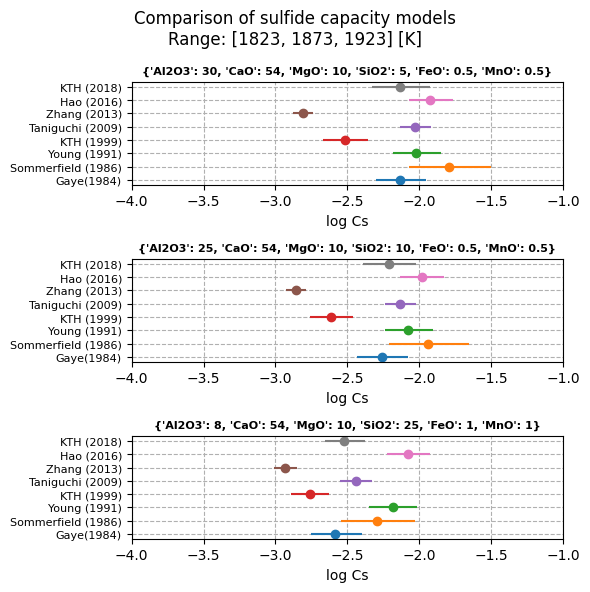

In [26]:
TK = [1823, 1873, 1923] # [K]
slagComps = [slagComp1, slagComp2, slagComp3]

fig, axes = plt.subplots(nrows=3, figsize=(6, 6))
for ii, slagComp in enumerate(slagComps):
    Gay, Som, You, Kt1, Tan, Zha, Hao, Kt2 = [], [], [], [], [], [], [], []
    for Tk in TK:
        Gay.append(cS.logCs_Gaye(slagComp, Tk))       # 1984
        Som.append(cS.logCs_Sommer(slagComp, Tk))     # 1986
        You.append(cS.logCs_Young(slagComp, Tk))      # 1991
        Kt1.append(cS.logCs_KTH(slagComp, Tk, False)) # 1999
        Tan.append(cS.logCs_Tani(slagComp, Tk))       # 2009
        Zha.append(cS.logCs_Zhang(slagComp, Tk))      # 2013
        Hao.append(cS.logCs_Hao(slagComp, Tk))        # 2016
        Kt2.append(cS.logCs_KTH(slagComp, Tk, True))  # 2018
  
    models = [Gay, Som, You, Kt1, Tan, Zha, Hao, Kt2]
    #graph data
    for jj, logCs in enumerate(models):
        axes[ii].errorbar(
            y=jj, 
            x=logCs[1], 
            xerr=([abs(logCs[1]-max(logCs))], [abs(logCs[1]-min(logCs))]),  
            fmt='o'
        )
    #format
    axes[ii].set_yticks([0, 1, 2, 3, 4, 5, 6, 7])
    axes[ii].set_yticklabels(
        ["Gaye(1984)", "Sommerfield (1986)", "Young (1991)", "KTH (1999)", "Taniguchi (2009)", "Zhang (2013)", "Hao (2016)", "KTH (2018)"],
        fontsize=8
    )
    axes[ii].set_xlabel('log Cs')
    axes[ii].set_xlim(-4, -1)
    axes[ii].grid(ls='--')
    axes[ii].set_title(slagComp, fontsize=8, fontweight='bold')

fig.suptitle(f"Comparison of sulfide capacity models\nRange: {TK} [K]")
fig.tight_layout()
plt.show()

# Referencias

[Duffy & Ingram (1976)](https://www.sciencedirect.com/science/article/pii/0022309376900272)  

    Duffy J A, Ingram M D  (1976)
    An Interpretation of Glass Chemistry in Terms of the Optical Basicity Concept  
    Journal of Non-crystalline Solids 21, pp. 373-410 (1976)


[Faral & Gaye (1984)]()  

    Faral M & Gaye H  (1984)
    Metal slag equilibria.   
    In: Proc Second Intern Symposium Metall Slags and Fluxes, TMS-AIME. 1984. pp. 159–179
    
    
[Sosinsky & Sommerville (1986)](https://link.springer.com/article/10.1007/BF02655080)  

    Sosinsky N J & Sommerville I D (1986)
    The composition and temperature dependence of the sulfide capacity of metallurgical slags.  
    Metall Trans B 17, pp. 331–337 
    
[Young (1991)](https://cordis.europa.eu/project/id/7210-CF-802/results)

    Young R W (1991)
    Use of the optical basicity concept for determining phosphorus and sulphur slag/metal partitions.
    European Report EUR 13176 EN.
    
[Mills (1993)](https://www.jstage.jst.go.jp/article/isijinternational1989/33/1/33_1_148/_article)

    Mills K C (1993)
    The Influence of Structure on the Physico-chemical Properties of Slags
    ISIJ International 33, pp. 148-155


[Taniguchi et al (2009)](https://www.jstage.jst.go.jp/article/isijinternational/49/2/49_2_156/_article)

    Taniguchi Y, Sano N & Seetharaman S (2009)
    Sulphide Capacities of CaO–Al2O3–SiO2–MgO–MnO Slags in the Temperature Range 1673–1773K
    ISIJ International 49, pp. 156-163
    
[Zhang et al. (2013)](https://www.jstage.jst.go.jp/article/isijinternational/53/5/53_761/_article/-char/en)

    Zhang G H, Chou K C & Pal U (2013)
    Estimation of Sulfide Capacities of Multicomponent Slags using Optical Basicity
    ISIJ International 53, pp. 761-767
    
[Nzotta et al. (1998)](https://link.springer.com/article/10.1007/s11663-999-0096-4)

        Nzotta M M, Sichen D & Seetharaman S (1998)
        Sulphide capacities in some multi component slag systems. 
        ISIJ international 38, pp. 1170-1179

[Nzotta et al. (1999)](https://link.springer.com/article/10.1007/s11663-999-0096-4)

        Nzotta M M, Sichen D & Seethraman S (1999)
        A study of the sulfide capacities of iron-oxide containing slags.
        Metallurgical and Materials Transactions B 30, pp. 909-920
        
[Hao & Wang (2016)](https://onlinelibrary.wiley.com/doi/full/10.1002/srin.201500065)

    Hao X & Wang X
    A New Sulfide Capacity Model for CaO-Al2O3-SiO2-MgO Slags Based on Corrected Optical Basicity
    Steel Research International 87, 359 - 363 (2016)